In [284]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [285]:
import pathlib

data_dir = pathlib.Path("DATA") # indiquer chemin  où sont les données

In [286]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # compte le nb d'images dans le dossier
image_count

20

In [287]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]) 
CLASS_NAMES # liste des noms de dossiers

array(['De', 'Pour,vers'], dtype='<U9')

In [288]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30)

In [289]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [290]:
train_data_gen = train_datagen.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
#On importe les images

Found 248 images belonging to 2 classes.


In [291]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
#Fonction d'affichage des images

In [292]:
def show_batch_greyscale(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(np.squeeze(image_batch[n]),cmap = "gray")
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
#Fonction d'affichage des images grissées

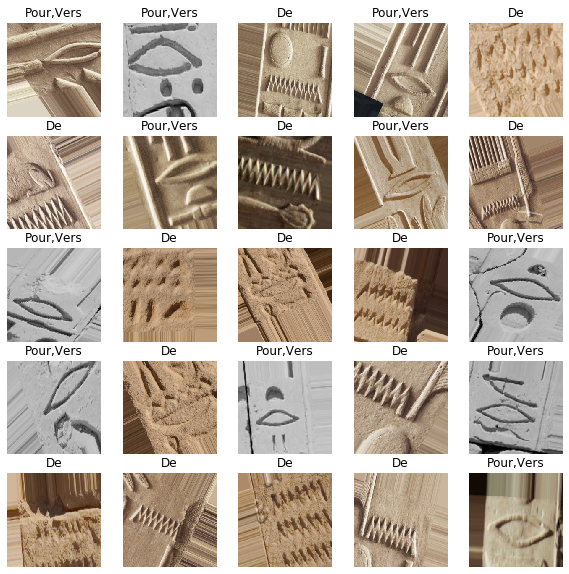

In [293]:
image_batch, label_batch = next(train_data_gen) #Pour séparer le label de l'image
show_batch(image_batch, label_batch)
#show_batch_greyscale(image_batch, label_batch)

In [294]:
image_batch.shape

(32, 224, 224, 3)

In [295]:
def augm(datagen):
    datagen.fit(image_batch)
    augmT = []
    for el in datagen.flow(image_batch,shuffle=False):
        for i in range(0, len(el)):
            if i == 0 : augmT.append(el[i])
            else : augmT.append(el[i])

        break
    augmT =  np.array(augmT)
    return augmT
        

In [296]:

#datagen = ImageDataGenerator(rotation_range=30)
#datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
#datagen = ImageDataGenerator(brightness_range=[0.9,1.01])
#datagen = ImageDataGenerator(fill_mode='constant')
#datagen = ImageDataGenerator(cval=255)
datagen = ImageDataGenerator(width_shift_range=[-50,50])

new_img =  np.concatenate((image_batch,augm(datagen)))
new_label =  np.concatenate((label_batch,label_batch))


In [297]:
"""label = []
for item in label_batch:
    label.append(np.argmax(item))
label = np.array(label)"""

'label = []\nfor item in label_batch:\n    label.append(np.argmax(item))\nlabel = np.array(label)'

In [298]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(image_batch, label_batch, test_size=0.25)

In [299]:
#sauvegarde weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="weights/checkpoint_tfl.h5",
                                                 save_weights_only=True,
                                                 verbose=1)

In [300]:
HEIGHT = 224
WIDTH = 224

#base_model = ResNet50(weights='imagenet', 
#                      include_top=False, 
#                      input_shape=(HEIGHT, WIDTH, 3))


In [301]:
from keras.models import Sequential, Model
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers

In [302]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
for layer in model.layers:
    layer.trainable = False
test = []

In [303]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)
model_final = Model(input = model.input, output = predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.fit(trainX, trainY, epochs=10, 
                    validation_data=(testX, testY))
#,callbacks=[cp_callback]

C:\Users\theoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


Train on 24 samples, validate on 8 samples
Epoch 1/10
24/24 [==============================] - 4s 186ms/step - loss: 0.7605 - accuracy: 0.3750 - val_loss: 0.8044 - val_accuracy: 0.3750
Epoch 2/10
24/24 [==============================] - 4s 185ms/step - loss: 0.6953 - accuracy: 0.5833 - val_loss: 0.8027 - val_accuracy: 0.3750
Epoch 3/10
24/24 [==============================] - 4s 181ms/step - loss: 0.6487 - accuracy: 0.7500 - val_loss: 0.7988 - val_accuracy: 0.3750
Epoch 4/10
24/24 [==============================] - 4s 182ms/step - loss: 0.7186 - accuracy: 0.5417 - val_loss: 0.7897 - val_accuracy: 0.3750
Epoch 5/10
24/24 [==============================] - 4s 186ms/step - loss: 0.7787 - accuracy: 0.5000 - val_loss: 0.7769 - val_accuracy: 0.3750
Epoch 6/10
24/24 [==============================] - 4s 183ms/step - loss: 0.6406 - accuracy: 0.5833 - val_loss: 0.7619 - val_accuracy: 0.3750
Epoch 7/10
24/24 [==============================] - 4s 182ms/step - loss: 0.6563 - accuracy: 0.5833 - val

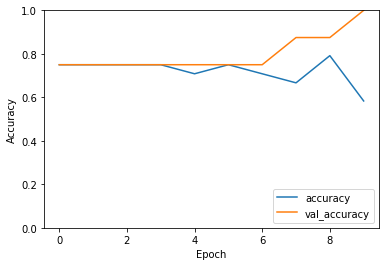

In [304]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_final.evaluate(testX,  testY, verbose=2)

In [305]:
print(test_acc)

0.375


In [306]:
pred = model_final.predict(image_batch)
pred[0]

array([0.5381128 , 0.46188727], dtype=float32)

In [307]:
model.layers

In [308]:
model_final.layers.pop()
model_final.layers.pop()
model_final.layers

In [315]:
model_final.layers.pop()

In [316]:
model_final.layers

In [317]:
pred = model_final.predict(image_batch)
pred

array([[0.5381128 , 0.46188727],
       [0.45360807, 0.54639196],
       [0.6455832 , 0.35441682],
       [0.60928994, 0.39071   ],
       [0.62541175, 0.37458825],
       [0.623717  , 0.37628296],
       [0.5042416 , 0.4957585 ],
       [0.5401954 , 0.45980462],
       [0.6180863 , 0.3819137 ],
       [0.68966955, 0.31033042],
       [0.4984144 , 0.5015856 ],
       [0.64986175, 0.35013828],
       [0.58626294, 0.41373706],
       [0.54291916, 0.45708084],
       [0.5223168 , 0.47768316],
       [0.52505404, 0.47494596],
       [0.6315613 , 0.36843875],
       [0.47955957, 0.5204404 ],
       [0.57721585, 0.42278415],
       [0.5394499 , 0.46055022],
       [0.6189294 , 0.3810706 ],
       [0.7119605 , 0.28803954],
       [0.61658615, 0.38341388],
       [0.5722917 , 0.42770833],
       [0.54686916, 0.4531308 ],
       [0.5816203 , 0.4183797 ],
       [0.56515133, 0.4348487 ],
       [0.5778673 , 0.4221327 ],
       [0.54955065, 0.45044935],
       [0.5869459 , 0.41305408],
       [0.

In [311]:
history

In [312]:
predictions

<tf.Tensor 'dense_32/Softmax:0' shape=(None, 2) dtype=float32>

In [313]:
from sklearn.manifold import TSNE
X = TSNE(n_components=3).fit_transform(x.output)

AttributeError: 'Tensor' object has no attribute 'output'

In [ ]:
quer = X[28]

In [ ]:
from scipy import spatial
X[spatial.KDTree(X).query(quer,k=6)[1]]

In [ ]:
distance,index = spatial.KDTree(X).query(quer,k=6)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for n in range(len(index)):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(np.squeeze(image_batch[index[n]]),cmap = "gray")
      plt.title(CLASS_NAMES[label_batch[index[n]]==1][0].title())
      plt.axis('off')

In [ ]:
x.name

In [ ]:
x.get_default_graph().get_operation_by_name('dense_2/Relu:0')